# Noisy-Clustering

Noise clustering describes a process/algorithm where each noisy data point, is assigned to a noise cluster. The approach also allows you to find "good" clusters among noisy data. The following lines of code will use DBSCAN as an simple clustering-algorithm to extract noisy data points from out datasets. 

- https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html# 
- https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html#

In [1]:
import os
import pandas as pd
import numpy as np
import random
from collections import Counter
import tensorflow as tf
import tensorflow_hub as tfhub
import seaborn as sns
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import matplotlib

In [2]:
txt_dir = "../datasets/cleaned_datasets/abstract_dataset" 

## Reading Data into DataFrame

In [3]:
def read_data(_dir:str) -> pd.DataFrame:
    data = {}
    data["url"] = []
    data["text"] = []
    data["class"] = []
    for root, dirs, files in os.walk(_dir):
        for _dir in dirs: 
            for txt_file in [x for x in os.listdir(os.path.join(root, _dir)) if x.endswith((".txt", ".TXT"))]:
                # Class name = dir name
                class_name = _dir
                #Read File
                file_name = os.path.abspath(os.path.join(root, _dir, txt_file))
                file = open(file_name, "r")
                txt = file.read()
                file.close()
                data["url"].append(file_name)
                data["text"].append(txt)
                data["class"].append(class_name)
    df = pd.DataFrame.from_dict(data)
    del data
    return df

In [4]:
%%time
df = read_data(txt_dir)

CPU times: user 3.48 s, sys: 4.98 s, total: 8.46 s
Wall time: 14.7 s


In [5]:
df.head()

,url,text,class
0,/Users/Daniel/PycharmProjects/Recommender-Syst...,this article proposes an adaptive network-base...,prediction
1,/Users/Daniel/PycharmProjects/Recommender-Syst...,rheumatoid arthritis and spondyloarthropathy a...,prediction
2,/Users/Daniel/PycharmProjects/Recommender-Syst...,background atrial fibrillation affects more th...,prediction
3,/Users/Daniel/PycharmProjects/Recommender-Syst...,the continually increasing number of complex d...,prediction
4,/Users/Daniel/PycharmProjects/Recommender-Syst...,the present study we developed an approach inv...,prediction


## Get the Embeddings

In [6]:
model_url = "./DAN/1fb57c3ffe1a38479233ee9853ddd7a8ac8a8c47/"

In [7]:
%%time
model = tfhub.Module(model_url)

CPU times: user 1.77 s, sys: 161 ms, total: 1.93 s
Wall time: 1.99 s


In [8]:
sess = tf.InteractiveSession()

In [9]:
sess.run([tf.global_variables_initializer(), tf.tables_initializer()])

[None, None]

In [10]:
%%time
embeddings = sess.run(model(list(df["text"])))

INFO:tensorflow:Saver not created because there are no variables in the graph to restore
CPU times: user 8min 21s, sys: 5min 16s, total: 13min 38s
Wall time: 13min 36s


In [11]:
sess.close()

In [12]:
print(df.shape)
print(embeddings.shape)

(50988, 3)
(50988, 512)


In [13]:
embeddings[0].reshape(1,-1).shape

(1, 512)

In [14]:
df["embedding"] = [np.squeeze(x.reshape(1,-1)) for x in embeddings]

In [15]:
df.head()

,url,text,class,embedding
0,/Users/Daniel/PycharmProjects/Recommender-Syst...,this article proposes an adaptive network-base...,prediction,"[0.042735662, 0.021815257, 0.02349077, -0.0371..."
1,/Users/Daniel/PycharmProjects/Recommender-Syst...,rheumatoid arthritis and spondyloarthropathy a...,prediction,"[0.040706687, 0.0053632045, 0.026868844, 0.037..."
2,/Users/Daniel/PycharmProjects/Recommender-Syst...,background atrial fibrillation affects more th...,prediction,"[0.046746496, -0.044463117, 0.011609156, -0.03..."
3,/Users/Daniel/PycharmProjects/Recommender-Syst...,the continually increasing number of complex d...,prediction,"[0.03451852, -0.039103337, 0.006733839, 0.0211..."
4,/Users/Daniel/PycharmProjects/Recommender-Syst...,the present study we developed an approach inv...,prediction,"[-0.04839624, 0.020339457, 0.011002538, 0.0469..."


## Dimensionality Reduction

### 3 Dimensional PCA

In [16]:
pca = PCA(n_components=3)

In [17]:
embeddings_lst = []

for emb in embeddings: 
    embeddings_lst.append(emb)

In [18]:
matrix = pca.fit_transform(embeddings_lst)

In [19]:
matrix.shape

(50988, 3)

In [20]:
df["x"] = matrix[:,0]
df["y"] = matrix[:,1]
df["z"] = matrix[:,2]

### 2 Dimensional PCA

In [21]:
pca = PCA(n_components=2)

In [22]:
embeddings_lst = []

for emb in embeddings: 
    embeddings_lst.append(emb)

In [23]:
matrix = pca.fit_transform(embeddings_lst)

In [24]:
df["a"] = matrix[:,0]
df["b"] = matrix[:,1]

In [25]:
df.head()

,url,text,class,embedding,x,y,z,a,b
0,/Users/Daniel/PycharmProjects/Recommender-Syst...,this article proposes an adaptive network-base...,prediction,"[0.042735662, 0.021815257, 0.02349077, -0.0371...",-0.238604,-0.071813,0.018628,-0.238604,-0.071819
1,/Users/Daniel/PycharmProjects/Recommender-Syst...,rheumatoid arthritis and spondyloarthropathy a...,prediction,"[0.040706687, 0.0053632045, 0.026868844, 0.037...",0.023897,-0.239988,-0.115107,0.023897,-0.239985
2,/Users/Daniel/PycharmProjects/Recommender-Syst...,background atrial fibrillation affects more th...,prediction,"[0.046746496, -0.044463117, 0.011609156, -0.03...",0.260257,-0.256321,0.183374,0.260257,-0.256316
3,/Users/Daniel/PycharmProjects/Recommender-Syst...,the continually increasing number of complex d...,prediction,"[0.03451852, -0.039103337, 0.006733839, 0.0211...",-0.305359,-0.138201,-0.084952,-0.305359,-0.138203
4,/Users/Daniel/PycharmProjects/Recommender-Syst...,the present study we developed an approach inv...,prediction,"[-0.04839624, 0.020339457, 0.011002538, 0.0469...",-0.025165,0.226426,-0.184652,-0.025165,0.226423


## Visualization

### Density & Scatter Plot (All Data)

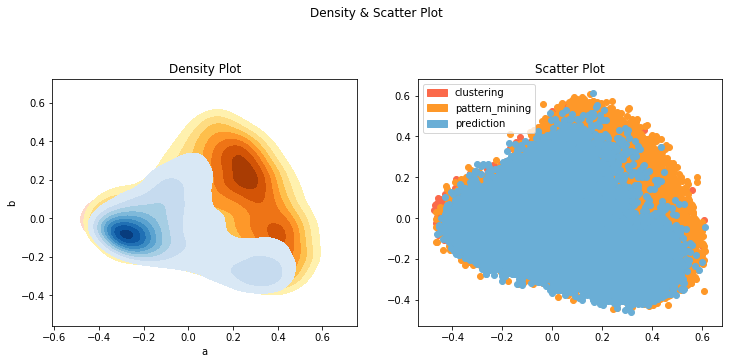

In [26]:
import matplotlib.patches as mpatches


cmaps = cmaps = ["Reds","YlOrBr", "Blues","Greens"]
#colors = ["red", "blue", "purple", "green", "", "grey"]
groups = df.groupby("class")
counter = 0

fig = plt.figure(figsize=(12,10))
fig.suptitle("Density & Scatter Plot")

ax_1 = fig.add_subplot(2,2,1)
ax_2 = fig.add_subplot(2,2,2)

ax_1.set_title("Density Plot")
ax_2.set_title("Scatter Plot")


labels = []
for name, group in groups: 
    # Change that ax = ax_1
    ax = sns.kdeplot(group.a,group.b, shade=True, cmap = cmaps[counter],shade_lowest=False, ax = ax_1)
    color_from_cmap = matplotlib.cm.get_cmap(cmaps[counter])(0.5)
    
    ax_2.scatter(group.a, group.b, color = color_from_cmap)
    labels.append(mpatches.Patch(color=color_from_cmap, label=name))
    counter +=1
legend = plt.legend(handles = labels)


### Density and Scatter Plot (Grouped by Class)

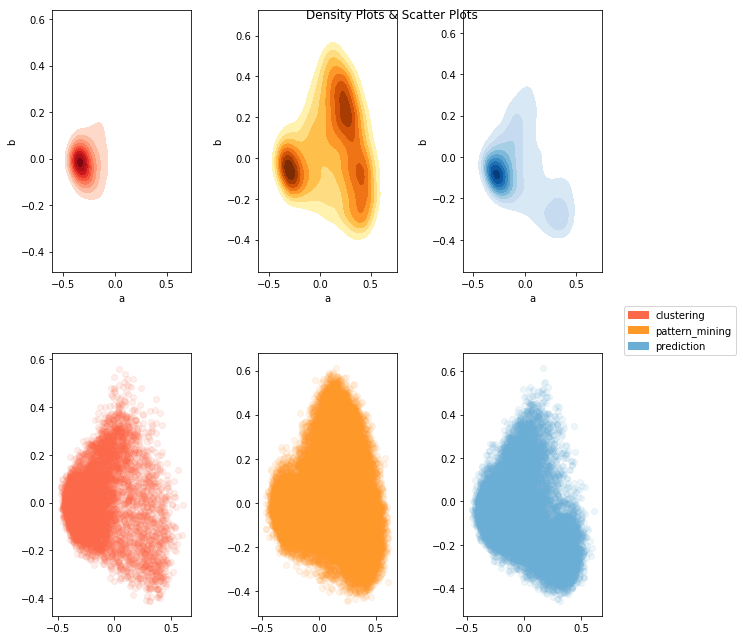

In [44]:
#%matplotlib inline
import matplotlib.patches as mpatches


cmaps = ["Reds","YlOrBr", "Blues","Greens"]
#colors = ["red", "blue", "yellow", "green", "", "grey"]
groups = df.groupby("class")
counter = 0

fig = plt.figure(figsize=(11,9))
fig.suptitle("Density Plots & Scatter Plots")

ax_1 = fig.add_subplot(2,3,1)
ax_2 = fig.add_subplot(2,3,2)
ax_3 = fig.add_subplot(2,3,3)

ax_4 = fig.add_subplot(2,3,4)
ax_5 = fig.add_subplot(2,3,5)
ax_6 = fig.add_subplot(2,3,6)

labels = []
axis = [ax_1, ax_2, ax_3]
axis_scatter = [ax_4, ax_5, ax_6]
for name, group in groups: 
    # Change that ax = ax_1
    ax = sns.kdeplot(group.a,group.b, shade=True, cmap = cmaps[counter],shade_lowest=False, ax = axis[counter])
    color_from_cmap = matplotlib.cm.get_cmap(cmaps[counter])(0.5)
    
    axis_scatter[counter].scatter(group.a, group.b, color = color_from_cmap, alpha = 0.1)
    labels.append(mpatches.Patch(color=color_from_cmap, label=name))
    counter +=1
legend = plt.legend(handles = labels, bbox_to_anchor=(2, 1.2))
fig.tight_layout()

### 3D Plot all Data

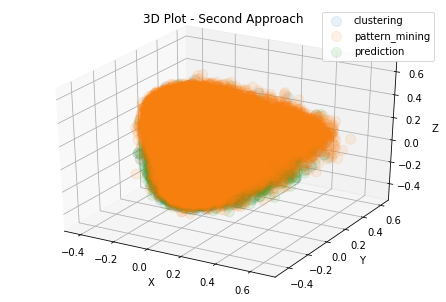

In [28]:
#%matplotlib notebook
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = Axes3D(fig)
fig.suptitle("3D Plot - Second Approach")

ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")

groups = df.groupby("class")
for name, group in groups:
    
    ax.scatter(group.z, group.y, group.x, s = 100, label=name, alpha = 0.1)
   
    ax.legend()


## Calculate Homogenity/Variance of an Cluster 

To calculate the Varaiance of an Cluster seems to be a bad idea. Maybe because due to the Softmax-Function (Every data point is in the sum == 1). 

TODO: 

- Find a Measure which explains the coherence of an cluster, so that we can say that the resulting clusters, without noise have a better coherence

In [29]:
from sklearn.metrics.cluster import homogeneity_score
from sklearn.cluster import DBSCAN

In [30]:
clusters = df.groupby("class")

In [31]:
#[x.reshape(1,-1) for x in df["embedding"]]

In [32]:
for _class, data in clusters: 
    embeddings = [x for x in df["embedding"]]
    print("{} variance: {}".format(_class,np.var(np.array(embeddings))))

clustering variance: 0.0019521506037563086
pattern_mining variance: 0.0019521506037563086
prediction variance: 0.0019521506037563086


## Clustering on all Data

In [33]:
len(df["embedding"].tolist())

50988

In [34]:
%%time
model_clustering = DBSCAN(eps = 0.45, metric = "cosine" ,min_samples = 4, n_jobs = -1)
#model_prediction = DBSCAN(eps = 0.3, metric = "cosine",min_samples = 7, n_jobs = -1)
model_pattern_mining = DBSCAN(eps = 0.3, metric = "cosine",min_samples = 6, n_jobs = -1)
#model_prediction = DBSCAN(eps = 0.3, metric = "cosine",min_samples = 9, n_jobs = -1)
model_prediction = DBSCAN(eps = 0.4, min_samples = 3, metric = "cosine",  n_jobs = -1)

CPU times: user 15 µs, sys: 1 µs, total: 16 µs
Wall time: 21.9 µs


In [35]:
models = [model_clustering, model_pattern_mining, model_prediction]

In [36]:
%%time
x = 0
outlier_dataframes = {}
df_groups = {}
for _class, group in clusters:
    models[x].fit(group["embedding"].tolist())
    clusters = Counter(models[x].labels_)
    print("{}:{}".format(_class,clusters))
    outlier_dataframes[_class] = group[models[x].labels_==-1]
    
    _df = pd.DataFrame(group)
    _df["cluster"] = models[x].labels_
    df_groups[_class] = _df
    print(group[models[x].labels_==-1].shape)
    x += 1 

clustering:Counter({0: 10738})
(0, 10)
pattern_mining:Counter({0: 22924, -1: 56})
(56, 10)
prediction:Counter({0: 17265, 1: 4, -1: 1})
(1, 10)
CPU times: user 15.7 s, sys: 2min 54s, total: 3min 10s
Wall time: 3min 39s


In [37]:
#df_groups[2][df_groups[2]["cluster"]==6].head(50)

In [38]:
pd.set_option('display.max_colwidth', -1)

In [39]:
# Clustering
outlier_dataframes["clustering"][["class", "text"]].sample(frac=1).head()

ValueError: a must be greater than 0

In [40]:
# Pattern Mining
outlier_dataframes["pattern_mining"][["class", "text"]].sample(frac=1).head(20)

,class,text
39480,pattern_mining,examined and compared associations between religious variables and anxiety disorders in <unknown> young <unknown> middle-aged and <unknown> elderly community-dwelling adults who participated in wave of the piedmont nimh epidemiologic catchment area survey.religious variables included church attendance prayer and bible reading religious viewing importance of religion religious denomination and born again status.both six-month and life-time anxiety disorders were examined.all analyses were controlled for sex chronic illnesses recent negative life events and socioeconomic status using the cochran-mantel-haenszel method.in young adults rates of anxiety disorder were lower among frequent church attenders mainline protestants and those considering themselves born again .on the other hand anxiety disorder was more frequent among younger adults affiliated with fundamentalist pentecostal religious groups those with no religious affiliation and frequent religious viewers or radio listeners.among middle-age adults social phobia was less common among frequent church attenders and those considering themselves born again although these differences disappeared when social support was controlled for.as reported elsewhere there was no relationship between religion and anxiety disorder in older adults.these findings suggest a pattern of both positive and negative relationships between religion and anxiety disorder that is most evident among uoung adults age to and weakens with age as dynamic factors increase the complexity of these relationships
45148,pattern_mining,this chapter discusses the patterned thermal destruction of human remains in a forensic setting.in the rapidly changing world of forensic science more specifically forensic anthropology there is a necessity to understand and be able to interpret fire modification of human remains.with the enormous potential for fire and heat alterations to inhibit scientists abilities to interpret patterns to human remains burn trauma analysis is inconsistent and has been slow to mature in many disciplines.the destructive forces of fire often significantly alter damage or even destroy many recognisable patterns characteristics and evidence that we normally depend on.this likely contributes to the existence and persistence of old and untested theories concerning burned bone where inaccurate interpretations such as exploding skulls persist for decades and terminology is inconsistent.in fatal fire cases forensic anthropologists are primarily responsible for separating perimortem trauma from heat-induced fractures and for assigning temporal and sequential designations to trauma when possible.these findings may contribute to the determination of cause and manner of death time of death and perpetrator behaviour
48912,pattern_mining,this study examined the association between socioemotional dispositions from the developmental propensity model and reading comprehension and whether those associations could be accounted for by level of chaos in the home.data from <unknown> monozygotic and <unknown> same-sex dizygotic twin pairs age <unknown> were used.a parent rated the twins on sympathy respect for rules negative emotionality and daring and level of chaos in the twins home.reading comprehension was measured using a state-wide school assessment.only respect for rules significantly and uniquely predicted reading comprehension.biometric models indicated that respect for rules was positively associated with reading comprehension via the shared environment and home chaos accounted for a significant amount of that shared environmental variance even after controlling for family income.children with higher respect for rules have better reading comprehension scores in school and this relationship owes partly to the level of chaos in the family home
45175,pattern_mining,studies were conducted in order to assess the level of aluminium in samples of indian tea coffee toothpaste paan masa

In [41]:
# Prediction
outlier_dataframes["prediction"][["class", "text"]].sample(frac=1).head()

,class,text
4519,prediction,the liptinite maceral group has been revised by iccp in accordance with the iccp system <unknown> decision to publish this classification in the recent form was accepted at the iccp plenary session on september <unknown> in houston


In [ ]:
# It's possible that you see less outliers then in the cluster because of duplicates
# outlier_dataframes["clustering"][["a", "b"]].drop_duplicates()

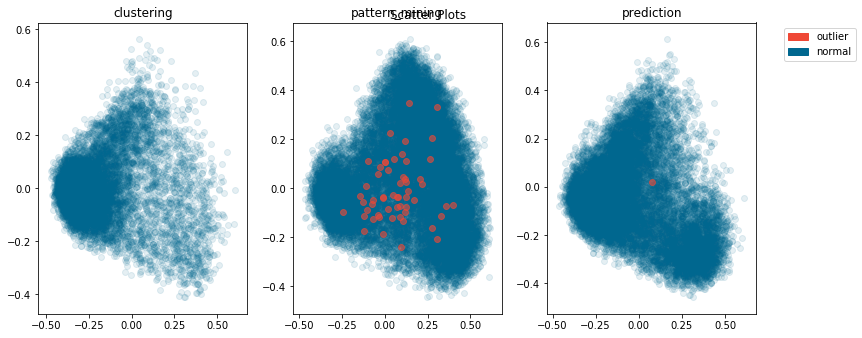

In [42]:
#%matplotlib backend
%matplotlib inline
import matplotlib.patches as mpatches

groups = df.groupby("class")
counter = 0

fig = plt.figure(figsize=(12,9))
fig.suptitle("Scatter Plots")

ax_1 = fig.add_subplot(2,3,1)
ax_2 = fig.add_subplot(2,3,2)
ax_3 = fig.add_subplot(2,3,3)

labels = [mpatches.Patch(color="#EF4836", label="outlier"), 
          mpatches.Patch(color="#00678F", label="normal")]

axis = [ax_1, ax_2, ax_3]
for name, group in groups: 
    # Change that ax = ax_1
    axis[counter].set_title(name)
    axis[counter].scatter(group.a, group.b, color = "#00678F", alpha = 0.1)
    color_from_cmap = matplotlib.cm.get_cmap(cmaps[counter])(0.5)
    legend = plt.legend(handles = labels, bbox_to_anchor=(1.5, 1.0))
    axis[counter].scatter(outlier_dataframes[name]["a"], outlier_dataframes[name]["b"], color = "#EF4836", alpha = 0.6)
    counter +=1
fig.tight_layout()

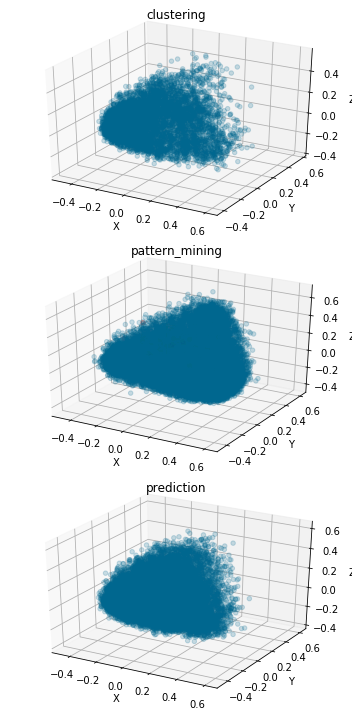

In [43]:
#%matplotlib notebook
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize = (5,10))
#ax = Axes3D(fig)


for i,_class in enumerate(df_groups.keys()):
    ax = fig.add_subplot(3,1,i+1, projection = "3d")
    
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.set_zlabel("Z")
    
    
    ax.set_title(_class)
    _df = df_groups[_class]
    for cluster, data in _df.groupby("cluster"):
        if cluster != -1:
            # color_from_cmap = matplotlib.cm.get_cmap("Blues")(random.uniform(0, 1))
            ax.scatter(data.x, data.y, data.z, color = "#00678F", alpha = 0.2)
        else:
            ax.scatter(data.x, data.y, data.z, color = "#EF4836", alpha = 0.4)
fig.tight_layout()

## Clustering on PCA Data

In [45]:
pd.set_option('display.max_colwidth', 0)

In [46]:
%%time
model_clustering_pca = DBSCAN(eps = 0.095, metric = "euclidean" ,min_samples = 20, n_jobs = -1)
#model_pattern_mining_pca = DBSCAN(eps = 0.15, metric = "euclidean" ,min_samples = 10, n_jobs = -1)
model_pattern_mining_pca = DBSCAN(eps = 0.11, metric = "euclidean" ,min_samples = 10, n_jobs = -1)
#model_prediction_pca = DBSCAN(eps = 0.1, metric = "euclidean" ,min_samples = 30, n_jobs = -1)
model_prediction_pca = DBSCAN(eps = 0.094, metric = "euclidean" ,min_samples = 30, n_jobs = -1)

CPU times: user 17 µs, sys: 1e+03 ns, total: 18 µs
Wall time: 21.9 µs


In [47]:
models_pca = {"clustering":model_clustering_pca,
          "pattern_mining":model_pattern_mining_pca,
          "prediction":model_prediction_pca}

In [48]:
%%time
df_groups_pca = {}
for _class, group in df.groupby("class"): 
    x = group["x"]
    y = group["y"]
    z = group["z"]
    
    points = []
    for point in zip(x,y,z):
        points.append(point)
    
    models_pca[_class].fit(points)
    clusters = Counter(models_pca[_class].labels_)
    print("{}:{}".format(_class,clusters))
    
    _df = pd.DataFrame(group)
    _df["cluster"] = models_pca[_class].labels_
    df_groups_pca[_class] = _df

clustering:Counter({0: 10663, -1: 75})
pattern_mining:Counter({0: 22980})
prediction:Counter({0: 17167, -1: 103})
CPU times: user 4.6 s, sys: 155 ms, total: 4.75 s
Wall time: 1.98 s


In [49]:
# Prediction
x = df_groups_pca["clustering"][["class", "text", "cluster"]]
x[x["cluster"] != 0].head(10)

,class,text,cluster
17790,clustering,background nontuberculous mycobacteria are environmental organisms associated with pulmonary disease without person-to-person transmission.although genetic causes of disseminated ntm infection are well characterized genetic causes for most human susceptibility to pulmonary ntm infection have not been determined.methods family histories for relevant disease characteristics were obtained as part of an ongoing natural history study.six families were identified in which at least two blood relatives had pulmonary ntm.a systematic review of medical records extracted data relevant to pulmonary infection and baseline demographics.data were reconfirmed by telephone interviews.results familial clustering of pulmonary ntm was proven in six families.four of the families were white and the majority of affected individuals were women.five of patients had cystic fibrosis transmembrane conductance regulator gene variations but none had classic cystic fibrosis.infections were caused by both slow and rapid growing mycobacteria including mycobacterium avium mycobacterium intracellulare mycobacterium kansasii mycobacterium abscessus and mycobacterium massiliense.family members were typically infected with different species of ntm.conclusion identified six familial clusters of pulmonary ntm infection suggesting that there are genetic factors contributing to host susceptibility to pulmonary infection with ntm among some individuals with nodular bronchiectatic disease,-1
17969,clustering,limited information is available on fatty acid and mineral composition of cluster bean genotype seeds grown in mediterranean climates including turkey.this study aimed to evaluate seed composition of thirty cluster bean genotypes according to genotype trait biplot analysis.genotype fatty acid biplot captured <unknown> and genotype micro element biplot captured <unknown> of variation.the results of the present study indicated that oleic acid ranged from <unknown> to <unknown> linoleic acid ranged from <unknown> to <unknown> in all genotypes.concentrations of the six micronutrient elements were considerably different in genotypes.fe and are the most commonly found elements in cluster bean genotypes.our results depicted that <unknown> was the most favorable genotype according to fatty acid profile while and <unknown> had the highest and contents and was the most stable genotype according to micronutrient profiles,-1
17998,clustering,the growth and physiological parameters of fourteen tomato cultivars were measured during both mild and severe drought.the tomato cultivars showed decrease in growth traits relative water content and pigments content under both drought treatments compared with the control.by contrast proline accumulation malondialdehyde and electrolyte leakage increased in the cultivars.the activity of superoxide dismutase was more correlated to drought stress than those of ascorbate peroxidase or catalase.the combined approach of principal component analysis hierarchical clustering analysis and calculating mean tolerance value showed relative differences in drought tolerance among the cultivars.the studied cultivars were clustered into four groups.four cultivars were placed in cluster as the drought-tolerant group.moderately tolerant cultivars were grouped into cluster ii.the clusters iii and represented the sensitive and highly sensitive cultivars respectively.early orbana roma and cal-j cultivars were indicated as the highly sensitive tomato cultivars.it was concluded that such an approach could be used as a useful tool to screen the other abiotic or even biotic stress tolerance in tomato,-1
18006,clustering,pedestrian stampede happened more and more often during these years such as love parade disaster in germany <unknown> trampling in shanghai bund <unknown> and crowd stampede in pilgrimages.love parade disaster <unknown> stands out for well recorded videos which are quality and available for researchers.there were 

In [50]:
# Prediction
x = df_groups_pca["pattern_mining"][["class", "text", "cluster"]]
x[x["cluster"] != 0].head(10)

,class,text,cluster


In [51]:
# Prediction
x = df_groups_pca["prediction"][["class", "text", "cluster"]]
x[x["cluster"] != 0].head(10)

,class,text,cluster
633,prediction,the phylogenetic relationships and classification of the freshwater fish order cypriniformes like many other species-rich groups of vertebrates has evolved over time with some consistency and inconsistencies of relationships across various studies.within cypriniformes the holarctic family leuciscidae is one of the most widely distributed and highly diverse monophyletic groups of cyprinoids.despite several studies conducted on this group alternative hypotheses exist as to the composition and relationships within leuciscidae.here we assess the extent composition phylogenetic relationships and taxonomy of this highly diverse group of fishes using multiple mitochondrial and nuclear loci and a comprehensive and dense taxonomic sampling.a close relationship exists between eurasian phoxinus and clades while fea is the sister group to all remaining leuciscidae.major lineages resolved within these six subfamilies are mostly congruent with some previous studies.our results suggests a complex evolutionary history of this diverse and widespread group of fishes,-1
636,prediction,crustins are considered effector molecules of innate immunity in arthropods and classification schemes have been proposed over the last years.however classification problems have emerged for example proteins that have been well identified as members of a particular category have also been classified as crustins.therefore the objective of this manuscript was to analyze and based on solid arguments improve the original proposed nomenclature to make crustins a distinctive group of antibacterial proteins.the presence of wap or <unknown> domain has been considered a distinctive feature of crustins however several antibacterial proteins containing wap domains have been detected in diverse taxonomic groups .here we present evidence supporting the idea that the cys-rich region and the <unknown> domain can be considered a signature of crustins and together with some distance arrangements occurring within this <unknown> region yield enough information for the classification of these proteins.herein the core characteristics to be considered for classification purposes are the length of the gly-rich region and the repetitive tetrapeptides occurring within this region these characteristics are then hierarchically followed by the and distances located within the <unknown> domain.finally the proposed system considers the crustin signature as the common structure in all members which is a differentiator from other proteins containing wap domains separating crustins as a well-distinguished member of the superfamily of wap-domain containing proteins,-1
947,prediction,protein-coupled receptors are critical factors in regulating morphogenesis mating infection and virulence in fungi.in this study various computational strategies were applied to identify gpcr-like proteins from the genomes of both verticillium dahliae and verticillium albo-atrum.the putative gpcrs were distributed over classes and significantly three of those represented novel classes of gpcr-like proteins in fungi.the three novel gpcrs had high levels of identity to their counterparts in higher eukaryotes including homo sapiens.the numbers of gpcr-like proteins in the two verticillium spp.were similar to those seen in other filamentous fungi such as magnaporthe grisea neurospora crassa and fusarium graminearum.additionally the carbon/amino acid receptors were divided into three different subclasses indicating that differences among the gpcrs existed not only among different classes but also within classes.in conclusion the identification and classification of gpcrs and their homology to some well-studied fungi will be an important starting point for future research in verticillium spp,-1
1027,prediction,vascular architecture changes during the development of cancer.dot-like loop vessels and brownish color changes in the areas between vessels are typical findings in high-grade intraepi

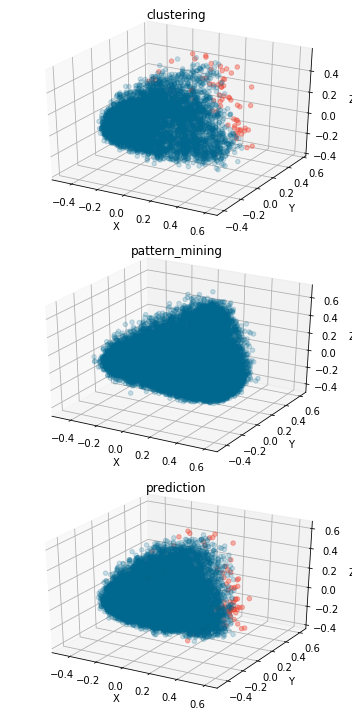

In [52]:
#%matplotlib notebook
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize = (5,10))
#ax = Axes3D(fig)


for i,_class in enumerate(df_groups_pca.keys()):
    ax = fig.add_subplot(3,1,i+1, projection = "3d")
    
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.set_zlabel("Z")
    
    
    ax.set_title(_class)
    _df = df_groups_pca[_class]
    for cluster, data in _df.groupby("cluster"):
        if cluster != -1:
            # color_from_cmap = matplotlib.cm.get_cmap("Blues")(random.uniform(0, 1))
            ax.scatter(data.x, data.y, data.z, color = "#00678F", alpha = 0.2)
        else:
            ax.scatter(data.x, data.y, data.z, color = "#EF4836", alpha = 0.4)
fig.tight_layout()

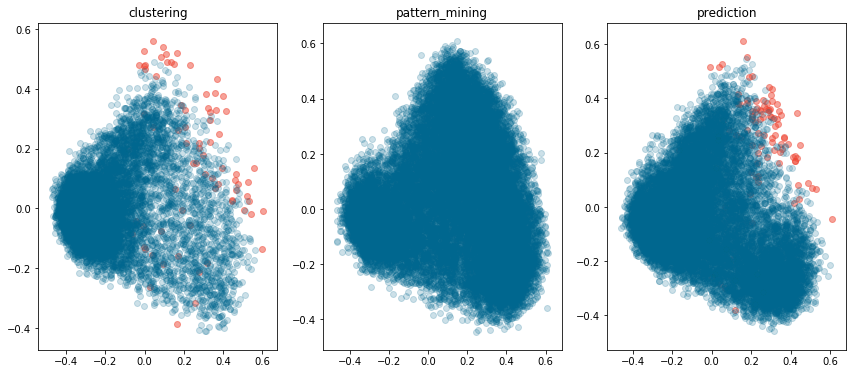

In [53]:
%matplotlib inline

fig = plt.figure(figsize=(12,10))
#fig.suptitle("Scatter Plots")


for i,_class in enumerate(df_groups_pca.keys()):
    ax = fig.add_subplot(2,3,i+1)
    ax.set_title(_class)
    _df = df_groups_pca[_class]
    for cluster, data in _df.groupby("cluster"):
        if cluster != -1:
            color_from_cmap = matplotlib.cm.get_cmap("Blues")(random.uniform(0, 1))
            ax.scatter(data.a, data.b, color = "#00678F", alpha = 0.2)
        else:
            ax.scatter(data.a, data.b, color = "#EF4836", alpha = 0.5)
fig.tight_layout()

## Creating a New Dataset

In [ ]:
dst_path = "out_data_abstracts"

In [ ]:
df_export = pd.concat(df_groups_pca)

In [ ]:
df_export.columns

In [ ]:
df_export = df_export[df_export["cluster"] != -1][["url","class"]]

In [ ]:
from shutil import copyfile

In [ ]:
%%time
for index,data in df_export.iterrows():
    #print(index)
    #print(data)
    file_name = str(index[1])+"_"+data["class"]+".txt"
    new_path = os.path.join(dst_path, data["class"])
    try: 
        os.makedirs(new_path)
    except FileExistsError: 
        pass
    try: 
        copyfile(data["url"], os.path.join(new_path, file_name))
    except FileExistsError: 
        print("{} is an duplicate and will not be copied twice".format(data["url"]))